In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def gaussian(x, A=1, sig=1, cen=0):
    return A * np.exp(-(x-cen)**2 / (2 * sig**2))

def mock_HI(fqs, T=100, fq0=1420.4e6, width=1e6):
    return gaussian(fqs, A=T, sig=width, cen=fq0)

def mock_Tsys(fqs, Trms=1):
    return np.random.normal(scale=Trms, size=fqs.shape)

def mock_bandpass(fqs, ripple_period=2.3e6, ripple_amp=0.1):
    return 1 + ripple_amp * np.cos(2 * np.pi * fqs / ripple_period)

def mock_obs(fqs, THI=100, fq0=1420.4e6, dTHI=0.1e6, Trms=1):
    return mock_bandpass(fqs) * (100 + mock_Tsys(fqs, Trms) + mock_HI(fqs, T=THI, fq0=fq0, width=dTHI))

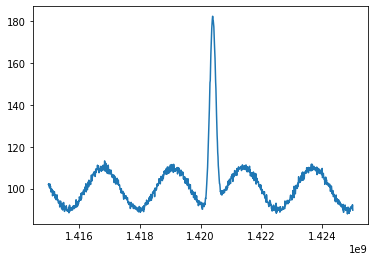

In [18]:
fqs = np.linspace(1415, 1425, 1024) * 1e6
plt.figure()
plt.plot(fqs, mock_obs(fqs))

In [20]:
%matplotlib notebook

In [ ]:
data = mock_obs(fqs)
mask = np.where(np.abs(fqs-1420.4e6) < 0.3e6, 0, 1)

<IPython.core.display.Javascript object>


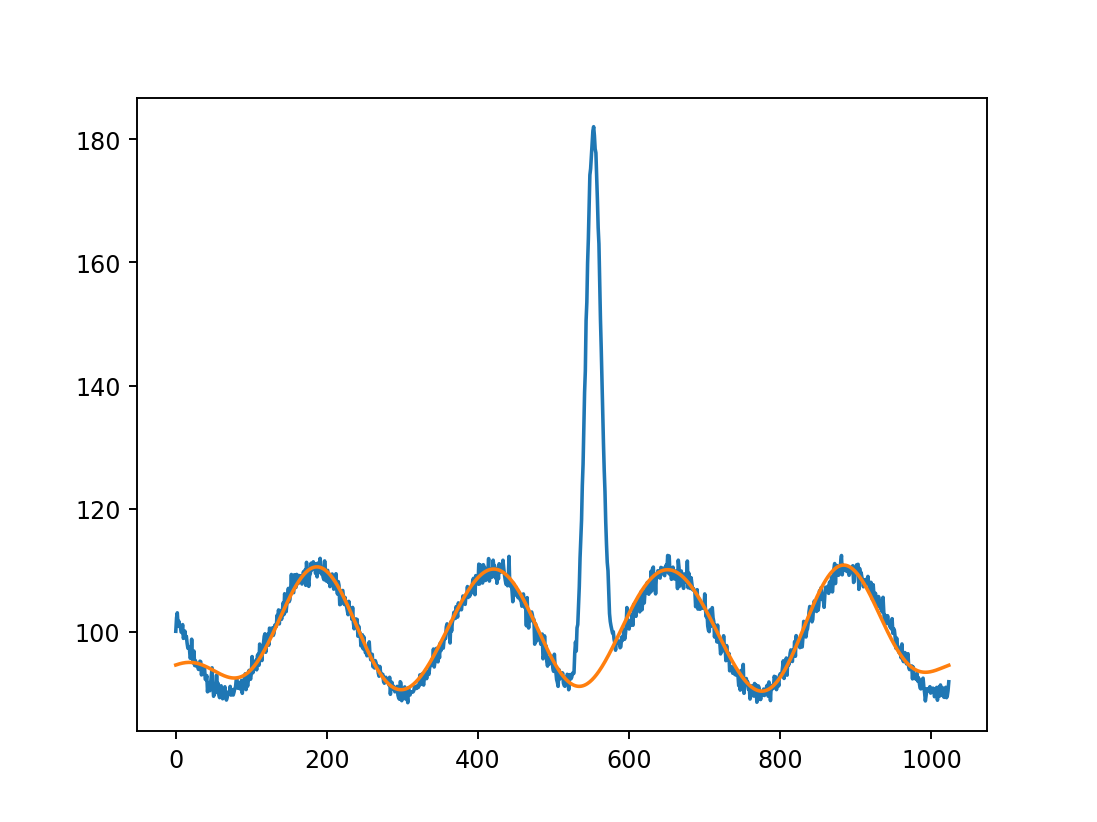

In [57]:
_data = np.fft.rfft(data * mask)
_dmdl = np.zeros_like(_data)
_mask = np.fft.rfft(mask)
for cnt in range(5000):
    i = np.argmax(np.abs(_data))
    _dmdl[i] = _data[i] / (_mask[0] / mask.size)
    dmdl = np.fft.irfft(_dmdl)
    _data = np.fft.rfft((data - dmdl) * mask)
plt.figure()
plt.plot(data)
plt.plot(dmdl)
#plt.plot(np.abs(_data))
#plt.plot(np.abs(_mask))

<IPython.core.display.Javascript object>


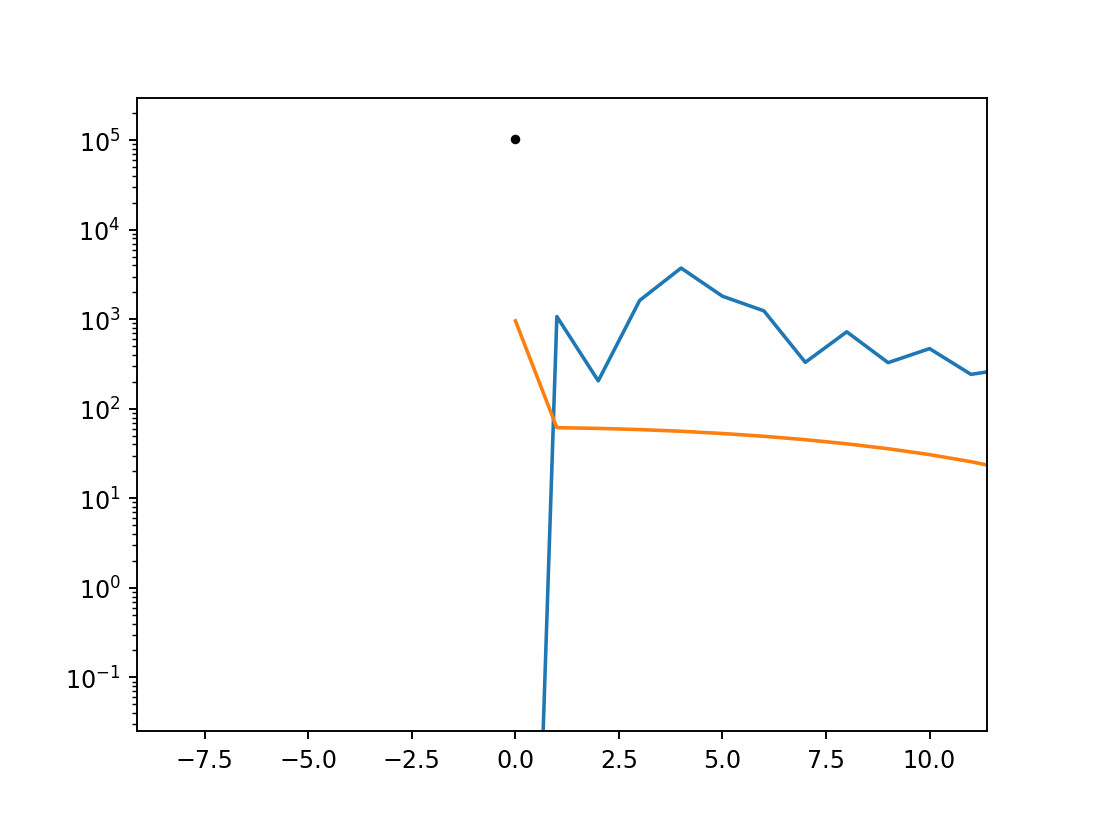

In [44]:
plt.figure()
plt.semilogy(np.abs(_data))
plt.semilogy(np.abs(_dmdl), 'k.')
plt.semilogy(np.abs(_mask))